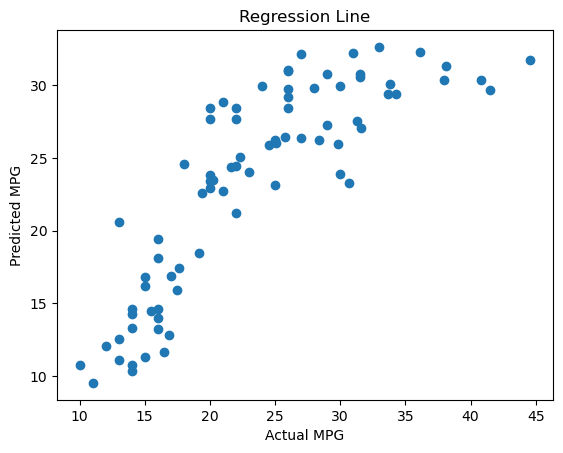

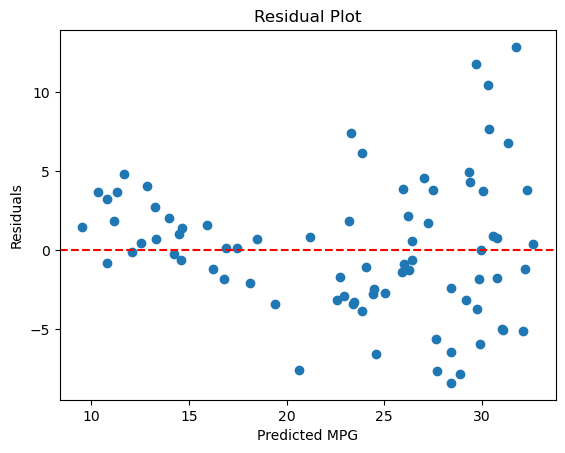

Mean Squared Error: 18.623882663743327
R-squared: 0.7003654038649295


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Membaca dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin', 'Car Name']
data = pd.read_csv(url, sep='\s+', names=column_names)

# Menghilangkan data yang hilang
data = data.replace('?', np.nan)
data = data.dropna()

# Memilih fitur yang akan digunakan
features = ['Cylinders', 'Displacement', 'Horsepower', 'Weight']
X = data[features]
y = data['MPG']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Membuat model regresi linier
model = LinearRegression()
model.fit(X_train, y_train)

# Memprediksi data uji
y_pred = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Visualisasi hasil
plt.scatter(y_test, y_pred)
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Regression Line")
plt.show()

# Plot residu
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted MPG")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(0, color='red', linestyle='--')
plt.show()

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, Binarizer, StandardScaler

# Membaca dataset Auto MPG
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin', 'Car Name']
data = pd.read_csv(url, sep='\s+', names=column_names)

# Menghilangkan data yang hilang
data = data.replace('?', np.nan)
data = data.dropna()

# Memilih fitur yang akan digunakan
features = ['Cylinders', 'Displacement', 'Horsepower', 'Weight']
X = data[features]

# Rescale data dengan Min-Max Scaling
scaler = MinMaxScaler()
X_rescaled = pd.DataFrame(scaler.fit_transform(X), columns=features)

# Binarize data dengan threshold
binarizer = Binarizer(threshold=150.0)
X_binarized = pd.DataFrame(binarizer.transform(X), columns=features)

# Standardize data dengan Standard Scaling
scaler = StandardScaler()
X_standardized = pd.DataFrame(scaler.fit_transform(X), columns=features)

# Tampilkan contoh beberapa baris data setelah pengolahan
print("Data Asli:")
print(X)
print("\nData Rescaled:")
print(X_rescaled)
print("\nData Binarized:")
print(X_binarized)
print("\nData Standardized:")
print(X_standardized)


Data Asli:
     Cylinders  Displacement Horsepower  Weight
0            8         307.0      130.0  3504.0
1            8         350.0      165.0  3693.0
2            8         318.0      150.0  3436.0
3            8         304.0      150.0  3433.0
4            8         302.0      140.0  3449.0
..         ...           ...        ...     ...
393          4         140.0      86.00  2790.0
394          4          97.0      52.00  2130.0
395          4         135.0      84.00  2295.0
396          4         120.0      79.00  2625.0
397          4         119.0      82.00  2720.0

[392 rows x 4 columns]

Data Rescaled:
     Cylinders  Displacement  Horsepower    Weight
0          1.0      0.617571    0.456522  0.536150
1          1.0      0.728682    0.646739  0.589736
2          1.0      0.645995    0.565217  0.516870
3          1.0      0.609819    0.565217  0.516019
4          1.0      0.604651    0.510870  0.520556
..         ...           ...         ...       ...
387        0.2  

C:\Users\ACER\miniconda3\envs\jcopml\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Binarizer was fitted without feature names
  warnings.warn(
